In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [137]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
# Load the dataset
file_path = '/content/drive/MyDrive/Car_Evaluation dataset/CAR_EVALUATION.csv'
data = pd.read_csv(file_path)
data.head()


,buying,maint,doors,persons,lug_boot,safety,Target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [139]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,Target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [141]:
# Encode the categorical features
le = LabelEncoder()
encoded_data = data.apply(le.fit_transform)


In [142]:
# Split the data into features and the original multi-class target
X = encoded_data.drop('Target', axis=1)
y = encoded_data['Target']

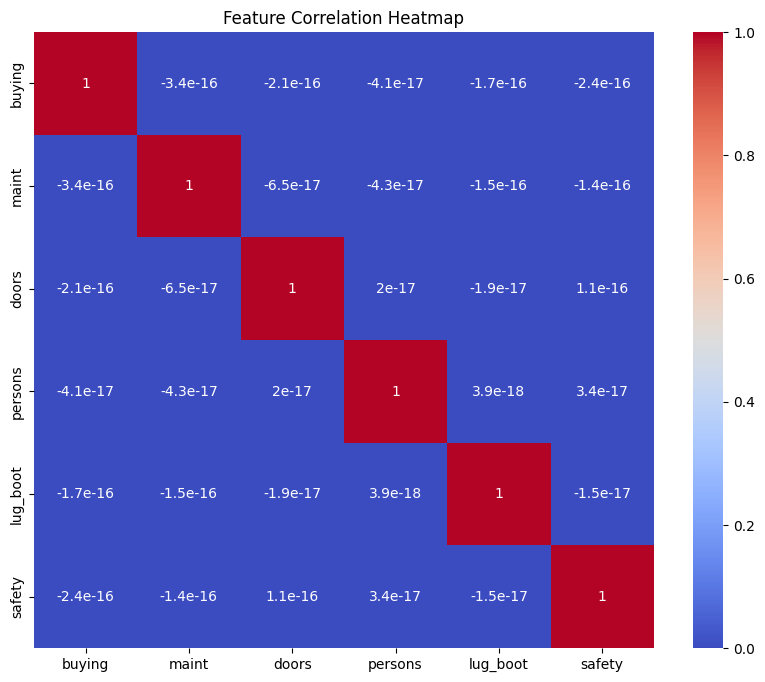

In [144]:
# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = encoded_data.drop('Target', axis=1).corr()  # Exclude Target for correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

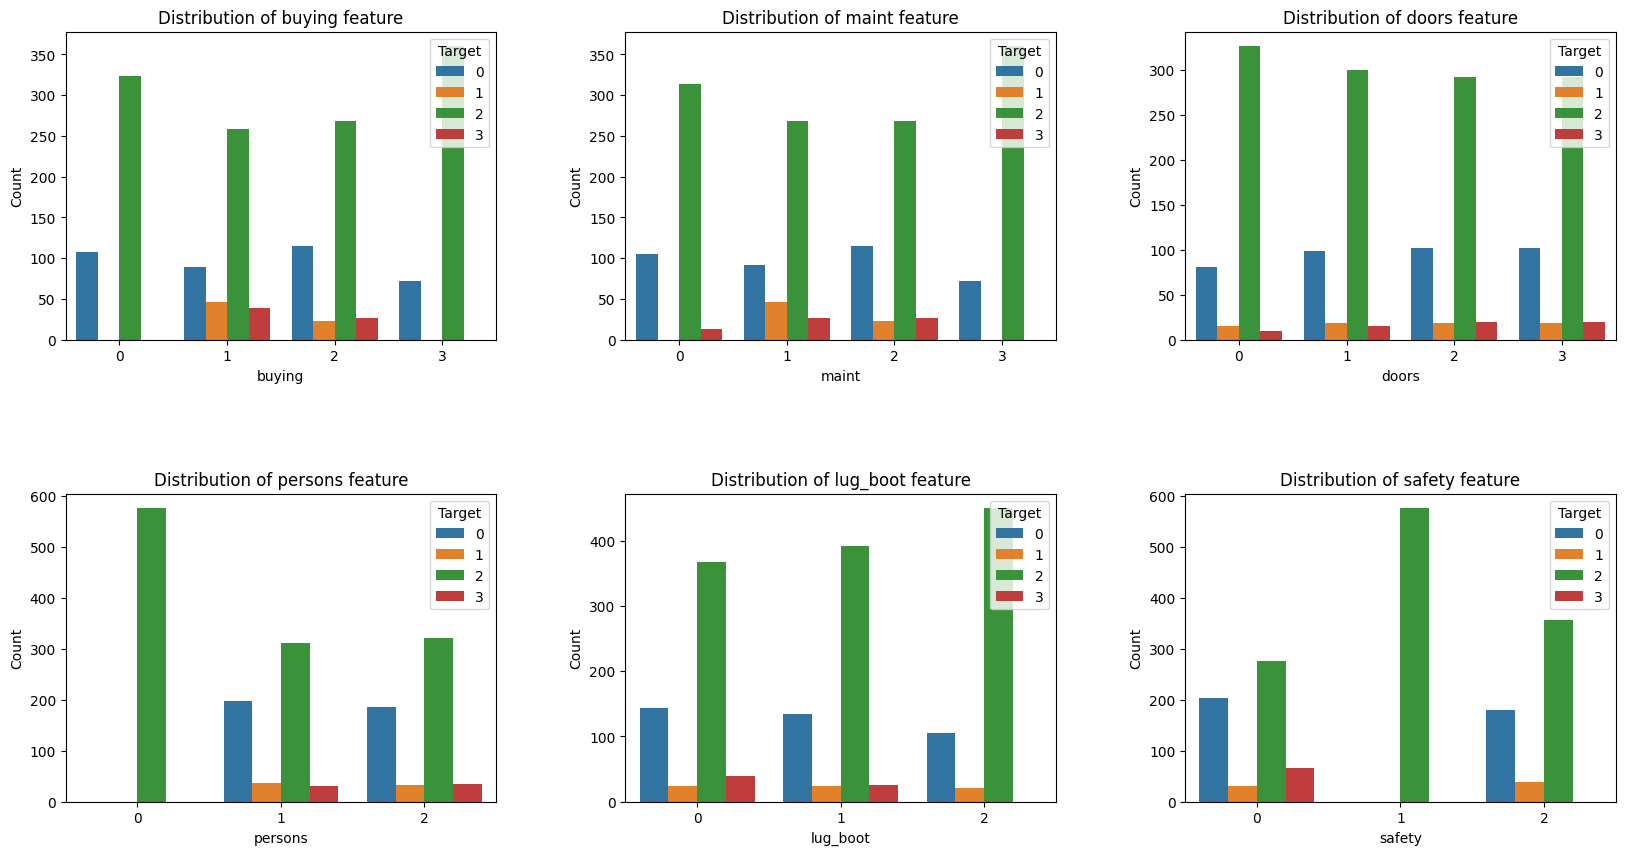

In [145]:
# Data Visualization of feature distributions with original categorical labels
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for i, column in enumerate(encoded_data.columns[:-1], 1):  # Exclude 'Target' column
    plt.subplot(2, 3, i)
    sns.countplot(x=column, hue="Target", data=encoded_data)
    plt.title(f"Distribution of {column} feature")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Target', loc='upper right')
plt.show()

In [146]:
# Split the dataset into training and test sets for the original target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision Tree classifier Model

In [148]:
# Initialize Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

In [149]:
#Trainig the model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [150]:
# Predicting the class Target
dt_pred = dt_clf.predict(X_test)

In [151]:
# Getting the accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)

In [152]:
# Getting the classification Report
dt_report = classification_report(y_test, dt_pred, zero_division=1)

In [153]:
#Getting the Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_pred)

In [154]:
# Plotting the confusion Matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for ' + title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Decision Tree Accuracy: 0.9739884393063584
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.62      0.91      0.74        11
           2       1.00      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346



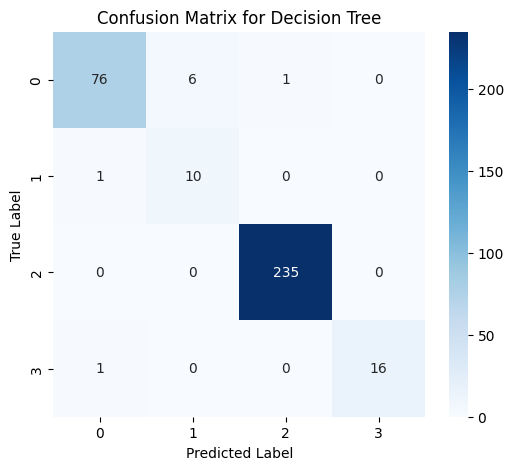

In [155]:
# Getting the accuracy, classification Report and Confusion Matrix for Decision Tree Classisfier
print(f"Decision Tree Accuracy: {dt_accuracy}")
print("Decision Tree Classification Report:")
print(dt_report)
plot_confusion_matrix(dt_cm, 'Decision Tree')

Logistic Regression Model

In [156]:
# Initialize LogisticRegression model
lr_clf = LogisticRegression(random_state=42, max_iter=1000)

In [157]:
#Trainig the model
lr_clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [158]:
# Predicting the class Target
lr_pred = lr_clf.predict(X_test_scaled)

In [159]:
# Getting the accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)


In [160]:
# Getting the classification Report
lr_report = classification_report(y_test, lr_pred, zero_division=1)

In [161]:
#Getting the Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_pred)


In [162]:
# Plotting the confusion Matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for ' + title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Logistic Regression Accuracy: 0.6589595375722543
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.13      0.18        83
           1       1.00      0.00      0.00        11
           2       0.72      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.50      0.26      0.25       346
weighted avg       0.59      0.66      0.59       346



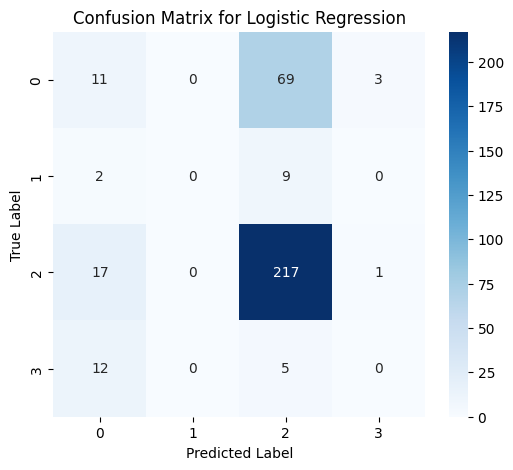

In [163]:
# Getting the accuracy, classification Report and Confusion Matrix for Logistic Regression
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print("Logistic Regression Classification Report:")
print(lr_report)
plot_confusion_matrix(lr_cm, 'Logistic Regression')


Gaussian Naive Bayes

In [164]:
# Initialize LogisticRegression model
gnb_clf = GaussianNB()

In [165]:
#Trainig the model
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [166]:
# Predicting the class Target
gnb_pred = gnb_clf.predict(X_test)

In [167]:
# Getting Accuracy
gnb_accuracy = accuracy_score(y_test, gnb_pred)

In [168]:
# Getting the classification Report
gnb_report = classification_report(y_test, gnb_pred, zero_division=1)


In [169]:
#Getting the Confusion Matrix
gnb_cm = confusion_matrix(y_test, gnb_pred)

In [170]:
# Plotting the confusion Matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for ' + title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Gaussian Naive Bayes Accuracy: 0.6242774566473989
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.10      0.16        83
           1       1.00      0.00      0.00        11
           2       0.82      0.81      0.82       235
           3       0.17      1.00      0.30        17

    accuracy                           0.62       346
   macro avg       0.62      0.48      0.32       346
weighted avg       0.72      0.62      0.61       346



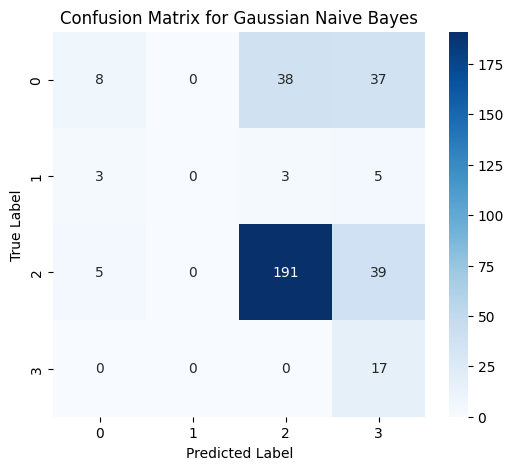

In [172]:
# Getting the accuracy, classification Report and Confusion Matrix for Logistic Regression
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy}")
print("Gaussian Naive Bayes Classification Report:")
print(gnb_report)
plot_confusion_matrix(gnb_cm, 'Gaussian Naive Bayes')

In [173]:
# Now we handle the binary classification for the Gaussian Process Classifier
# Define new binary classes based on the target variable 'Target'
binary_mapping = {'unacc': 0, 'acc': 1, 'good': 1, 'vgood': 1}  # Assuming 'acc', 'good', 'vgood' as 1
data['Binary_Target'] = data['Target'].map(binary_mapping)
y_binary = le.fit_transform(data['Binary_Target'])

In [174]:
# Split the dataset into training and test sets for the binary target
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [175]:
# Feature scaling for the binary target
X_train_binary_scaled = scaler.fit_transform(X_train_binary)
X_test_binary_scaled = scaler.transform(X_test_binary)

In [176]:
# Initialize the Gaussian Process Classifier for the binary target
gp_clf_binary = GaussianProcessClassifier(1.0 * RBF(1.0))

In [177]:
# Train the Gaussian Process Classifier for the binary target
gp_clf_binary.fit(X_train_binary_scaled, y_train_binary)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

In [178]:
# Predictions for the binary target
gp_pred_binary = gp_clf_binary.predict(X_test_binary_scaled)

In [179]:
# Evaluation for the binary target
gp_accuracy_binary = accuracy_score(y_test_binary, gp_pred_binary)
gp_report_binary = classification_report(y_test_binary, gp_pred_binary, zero_division=1)

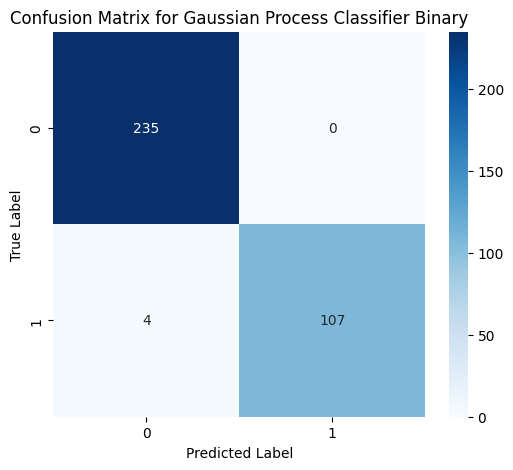

In [180]:
# Predictions for the binary target
gp_pred_binary = gp_clf_binary.predict(X_test_binary_scaled)

# Confusion matrix for the Gaussian Process Classifier's binary predictions
gp_cm_binary = confusion_matrix(y_test_binary, gp_pred_binary)

# Now you can call the function to plot the confusion matrix
plot_confusion_matrix(gp_cm_binary, 'Gaussian Process Classifier Binary')


In [181]:
print(f"Gaussian Process Classifier Binary Accuracy: {gp_accuracy_binary}")
print("Gaussian Process Classifier Binary Classification Report:")
print(gp_report_binary)


Gaussian Process Classifier Binary Accuracy: 0.9884393063583815
Gaussian Process Classifier Binary Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       235
           1       1.00      0.96      0.98       111

    accuracy                           0.99       346
   macro avg       0.99      0.98      0.99       346
weighted avg       0.99      0.99      0.99       346

